# Graph Convolutional Networks: 
## An explanation of the architecture by analogy to grid-based Convolutional Neural Networks (CNNs)

**Project background:**

This project encapsulates my work in the University of Illinois Chicago department of Mathematics, Statistics, and Computer Science's Spring 2025 Directed Reading Program (DRP). I presented a version of this content in a short talk at the conclusion of the semester.

https://sites.google.com/uic.edu/drpatuic/home

I was mentored by Jennifer Vaccaro, and am deeply grateful for her continued support and mentorship in this program!
DRP was co-organized by Yijia Chen, Nick Christo, Clay Mizgerd, and Michael Gintz.

**Abstract:**

Graph Convolutional Networks (GCNs) are a scalable and efficient machine learning approach to semi-supervised learning on graph structured data. GCNs are used to classify graphs and their features by aggregating information across adjacent nodes according to learnable parameters. They are a powerful tool which extends the concept of convolution on grid structured data (i.e. image processing contexts) to graph structured data. This finds applications in numerous settings including functional brain connectivity analysis, node classification, molecular property prediction, and link prediction.

I will discuss GCNs as first proposed by Thomas Kipf and Max Welling in their 2016 paper $\textit{Semi-Supervised Classification with Graph Convolutional Networks}$, in which the convolutional architecture they design emerges from a localized first-order approximation of spectral graph convolutions. This model learns hidden layer representations that encode information about local graph structutre and node features, enabling the model to learn complex features of the graph, and in turn enabling the various abilities of GCNs.

**Primary Texts:**

$\textit{Graph Representation Learning}$ - William L. Hamilton (2020)

$\textit{Semi-Supervised Classification with Graph Convolutional Networks}$ - Kipf & Welling (2017)


## CNNs and Image Convolution

I will start with a slightly simpler type of model: the Convolutional Neural Network (CNN). Traditional CNNs operate over grid structured data such as image pixel matrices, and learn hidden layer representations that encode features of the input grid and enable the model's application in various tasks. These types of model have found widespread use in computer vision, though they have uses in any setting where the data can be structured as a euclidean grid. 

### Convolution of images

Every image is a grid of nicely aranged pixels which each have some value $x_{i}$ associated with them. In the case of greyscale images, this is a single value between 0 and 1. In color images, $x_{i} = <r,g,b>$ is a vector  encoding the red, green, and blue values.


The main component of convolution is the *kernel*, which is simply another (typically smaller) grid with a defined weight for each entry. In one convolutional step, the kernel is passed over the entire image as partially illustrated below.

In [2]:
from IPython.display import display, HTML
display(HTML('<img src="Graphics/Grid convolution.png", width="750">'))

At each step as the kernel moves, a new value  $x'_{i}$ is generated for each pixel by *convolving* the filter weights with the pixel values, which just means taking a weighted linear combination of each pixel's immediate neighbors:

In [3]:
display(HTML('<img src="Graphics/2 - kernel on grid .png", width="750">'))

Once the kernel has been passed across the entire image, the effect is that information is spread across pixels, based on the chosen weights. How the weights are chosen determines the effect of the convolution. This fact is demonstrated next.

### Effect of Kernel Weights on Convolution

In [4]:
display(HTML('<img src="Graphics/Image convolution.png", width="750">'))

### Code to do these convolutions:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from PIL import Image

# Load the image and convert to grayscale
image = Image.open("Graphics/Bird.jpg").convert("L")
image_array = np.array(image)

**Various common kernels for image processing:**

In [5]:
blur_box = np.array([[ 1/9, 1/9, 1/9],
                     [ 1/9, 1/9, 1/9],
                     [ 1/9, 1/9, 1/9]])

gaussian_blur = np.array([[1/16, 2/16, 1/16],
                          [2/16, 4/16, 2/16],
                          [1/16, 2/16, 1/16]])

edge_detect = np.array([[ -1, -1, -1],
                        [ -1,  8, -1],
                        [ -1, -1, -1]])

vertical_edges = np.array([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]])

horizontial_edges = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

**Basic Blur:** The basic blur box simply averages values across pixels:

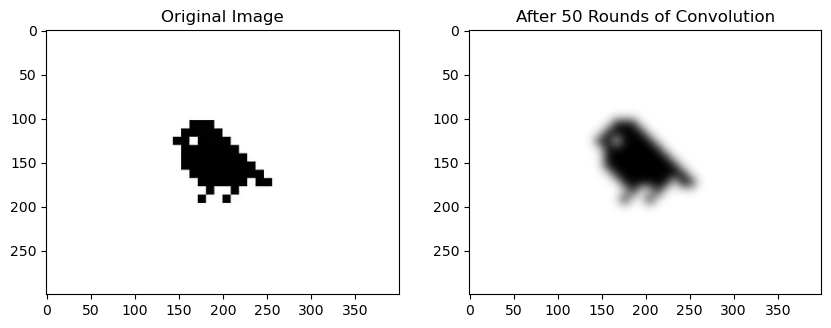

In [6]:
convolutions = 50

convolved = image_array

for _ in range(convolutions):
    convolved = convolve2d(convolved, blur_box, mode="same", boundary ="symm")


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")

plt.subplot(1,2,2)
plt.title("After "+str(convolutions)+" Rounds of Convolution")
plt.imshow(convolved, cmap="gray")


plt.show()

**Picking out features:** However, other weights can pick out specific features, such as edges, in the image.

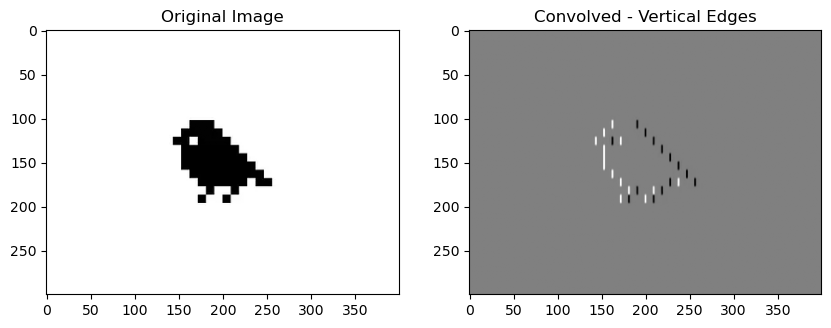

In [7]:
convolved = convolve2d(image_array, vertical_edges, mode="same", boundary="symm")

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")

plt.subplot(1,2,2)
plt.title("Convolved - Vertical Edges")
plt.imshow(convolved, cmap="gray")

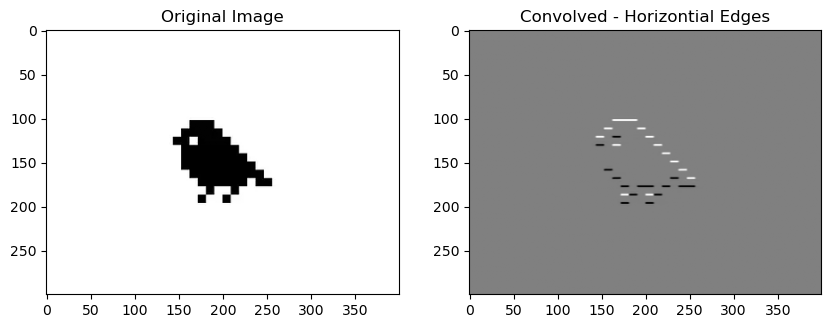

In [8]:
convolved = convolve2d(image_array, horizontial_edges, mode="same", boundary="symm")

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")

plt.subplot(1,2,2)
plt.title("Convolved - Horizontial Edges")
plt.imshow(convolved, cmap="gray")

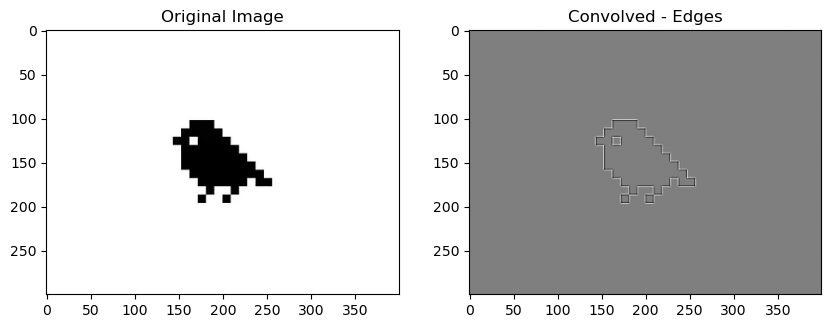

In [9]:
convolved = convolve2d(image_array, edge_detect, mode="same", boundary="symm")

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image_array, cmap="gray")

plt.subplot(1,2,2)
plt.title("Convolved - Edges")
plt.imshow(convolved, cmap="gray")

## CNNs

When constructing a CNN, multiple convolutional steps are combined, with unique kernel weights learnt at each hidden layer. The interlayer connectivity of neurons in the network is impacted by the size of the kernel (2x2, 3x3, etc.), but is fundamentally determined by the local proximity of pixels. The weights of each of these connections are the weights in the kernel, which are the parameters learnt by the model in training. 

In [5]:
display(HTML('<img src="Graphics/3dCNN.png", width="750">'))

In [6]:
display(HTML('<img src="Graphics/CNN.png", width="750">'))

In training, the output of the model is compared to the human-labelled classification for a number of examples via a loss function $\mathcal{L}$. When the model is wrong, $\mathcal{L}$ is large, when the model is correct, $\mathcal{L}$ is small.

In the simplest situation of image recognition, the classification is a single value representing the probability the image is a given thing, but in reality could be a vector in $\mathbb{R}^{C}$. For example, in hand written digit recogition, the output $\vec{O} \in \mathbb{R}^{9}$ encodes the probability a given digit is $0,...,9$. 

Various types of loss functions exist and may be prefered depending on the specific application and details of the classification (binary vs. categorical). A loss function commonly used in classification is Cross Entropy Loss. 

For N instances (training examples): 

**Binary Cross Entropy**:
$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N}(l_{i} log(o_{i}) +(1-l_{i})log(1-o_{i})) 
$

Where
- $l_{i}$ - true label for instance $i$
- $o_{i}$ - predicted probabilty by model for instance $i$

**Multiclass Cross Entropy**:
$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N}\sum_{j=1}^{C}(l_{i,j}  log(o_{i,j})
$

Where
- C is the number of classes
- $l_{i,j}$ - true labels for class $j$ for instance $i$
- $o_{i,j}$ - predicted probabilty by model for class $j$, for instance $i$

Using this loss function, the weights of the model are updated with the backpropogation algorithm, such that $\mathcal{L}$ is minimized. Over a large number of training examples, the model learns the optimal parameters within the given arcihitecture to correctly classify input images.

Abstractly, at each layer, the model learns to extract some useful feature in order to classify the image.

# Graph Convolutional Networks:

We can extend the same idea from grids to irregular graphs, however it is more complicated. We can think of grids as special, highly-regular graphs, where each pixel is a node connected to all of its immediate neighbors:

In [7]:
display(HTML('<img src="Graphics/grid to graph.png", width="750">'))

In grid convolution, the kernel defines both the neighboorhood over which information is aggregated (in this case the 1-hop neighborhood), and the weight of each neighbor's contribution to the update. In graph convolution, we will do this in two steps instead of one. First, we will define the message passsing algorithim, which gives us a way of spreading information across the structural neighborhoods of the graph, and then we use a seperate weight matrix that allows the model to learn to extract meaningful features.

### Message passing on graphs:

The message passing algorithm provides a way to distribute feature information between nodes of a graph based on the structure of the graph. Each node in the graph has a feature vector $\vec{x_{i}}$, which it sends out to its neighbors, and each node recieves a signal from its neighbors. After message passing, the updated feature vector $\vec{x'_{i}}$ is some combination of its own message and its neighbors'.

In [8]:
display(HTML('<img src="Graphics/message passing on graph.png", width="850">'))

This can actually be done by simply multiplying the adjacency matrix of the graph (with self loops) $\tilde{A}$ by a matrix $H^{(l)}$ whose $i-th$ row is the feature vector of the $i-th$ node in layer $l$.

In [9]:
display(HTML('<img src="Graphics/Unnormalized message passing.png", width="850">'))

The result of this is exactly what we wanted - each node's features are a combination of their own and their neighbors feautures in the last layer. However, this simply sums up feature information, and as such these values will grow larger and larger as further convolutions are performed. Additionally, due to the irregularity of the graph, some nodes have more neighbors and will accumlate information more quickly. This poses problems to training, namely exploding/vanishing activations and gradients. 

#### Degree Normalization

To account for this, $\tilde{A}$ is normalized by the degree of each node, that is, how many neighbors each node has. The normalized adjacency is: $\hat{A} = \tilde{D}^{-\frac{1}{2}}\tilde{A}\tilde{D}^{-\frac{1}{2}}$, where $\tilde{D}$ is a diagonal matrix that encodes the degree information of the graph with self-loops.

In [10]:
display(HTML('<img src="Graphics/degree normalized adjacency.png", width="950">'))

In spectral terms, this has the effect of ensuring the eigenvalues of $\hat{A}$ are between 0 and 1, which avoids the aforementined issues when training the model. This is made clear when we simply do the same message passing step as before, but with the degree normalized adjacency this time: 

In [11]:
display(HTML('<img src="Graphics/degree normalized message passing.png", width="950">'))

We see now that the contribution of each neighbor in the update is weighted according to its degree of connectivity: more connected nodes send a smaller fraction of their signal to each neighbor, and less connected nodes send a larger signal. The red box above shows how this fraction is determined. 


### Linear Projection Matrix

Degree normalization controls for the differences in connectivity resulting from an irregular graph structure, but is still only passing messages, i.e. averaging the features over the graph structure. This is roughly equivelent to the simple image blurring convolution discussed previously. Just as the CNN learned to pick out important features and classify an image, we want the GCN to be able to pick out features of the graph. 

The GCN will have a similar overall structure to the CNN:

In [12]:
display(HTML('<img src="Graphics/GCN.png", width="950">'))

The degree normalized adjacency $\hat{A}$ defines the interlayer connectivity based on the structure of the graph. The weights of those connections will be learned by the model, and defined seperately as a linear projection matrix $W^{(l)}$ for each convolutional layer. 

In [13]:
display(HTML('<img src="Graphics/MP and weights.png", width="950">'))

This enables the model to project the features into various linear feature spaces at different layers and extract meaningful patterns/structural features. Over the course of learning, these weight matrices are tuned to minmize the loss.

The only remaining thing to get to a complete GCN layer is to wrap this entire expression in a non-linear function, such as the sigmoid ($\sigma$) or rectified linear unit (ReLU) function.

In [14]:
display(HTML('<img src="Graphics/GCN layer wo LP.png", width="950">'))

This activation function acts element wise on the output of the matrix multiplications, acting to either threshold the activations above zero (ReLU), or to restrain them to between 0 and 1 ($\sigma$), as shown below. These functions are essential in enabling the model to exhibit non-linear behavior and learn to classify highly complex graphs, despite being made up primarily of linear operations.

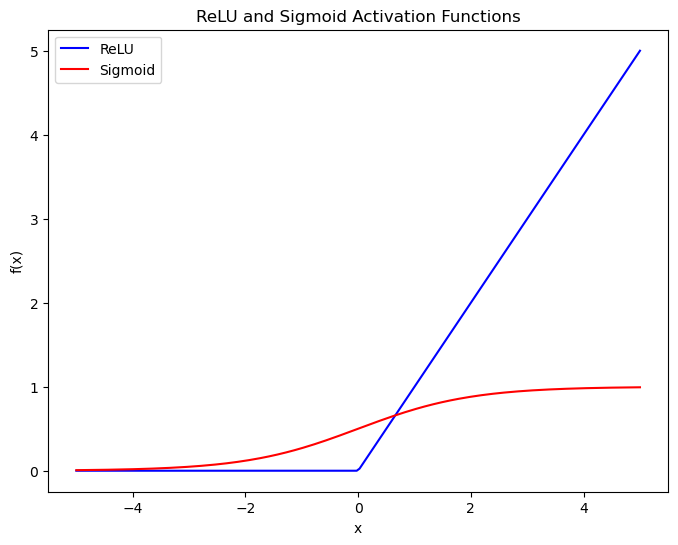

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLU(x):
    return np.maximum(0,x)

x = np.linspace(-5, 5, 200)

relu_y = ReLU(x)
sigmoid_y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, relu_y, label='ReLU', color='blue')
plt.plot(x, sigmoid_y, label='Sigmoid', color='red')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('ReLU and Sigmoid Activation Functions')
plt.legend()

plt.show()

# Conclusion:

The conceptual framework of Convolutional Neural Networks used in image recognition can be used to understand the function of Graph Convolutional Networks and their operation on irregular graph data. The adjacency matrix encodes the structure of the graph, and provides a way to spread feature information across nodes based on their connectivity. Degree normalization controls for differential connectivity of various nodes, and linear projection matrices are the parameters which allow the model to learn. These matrices are tuned during training, and allow the model to extract and make use of highly complex features of graph structure and feature information in learning how to classify graphs, or perform other tasks. 

# References

Daigavane, Ameya, Balaraman Ravindran, and Gaurav Aggarwal. 2021. “Understanding Convolutions on
Graphs.” Distill 6 (9): e32. https://doi.org/10.23915/distill.00032.

Hamilton, William L. 2020. “Graph Representation Learning.”

Jiang, Hao, Peng Cao, MingYi Xu, Jinzhu Yang, and Osmar Zaiane. 2020. “Hi-GCN: A Hierarchical Graph
Convolution Network for Graph Embedding Learning of Brain Network and Brain Disorders
Prediction.” Computers in Biology and Medicine 127
(December):104096. https://doi.org/10.1016/j.compbiomed.2020.104096.

Kipf, Thomas N., and Max Welling. 2017. “Semi-Supervised Classification with Graph Convolutional
Networks.” arXiv . https://doi.org/10.48550/arXiv.1609.02907.

Sanchez-Lengeling, Benjamin, Emily Reif, Adam Pearce, and Alexander B. Wiltschko. 2021. “A Gentle
Introduction to Graph Neural Networks.” Distill 6 (9): e33. https://doi.org/10.23915/distill.00033.

Wilson, Robin J. 1972. Introduction to Graph Theory. New York, Academic
Press. http://archive.org/details/introductiontogr00wils.